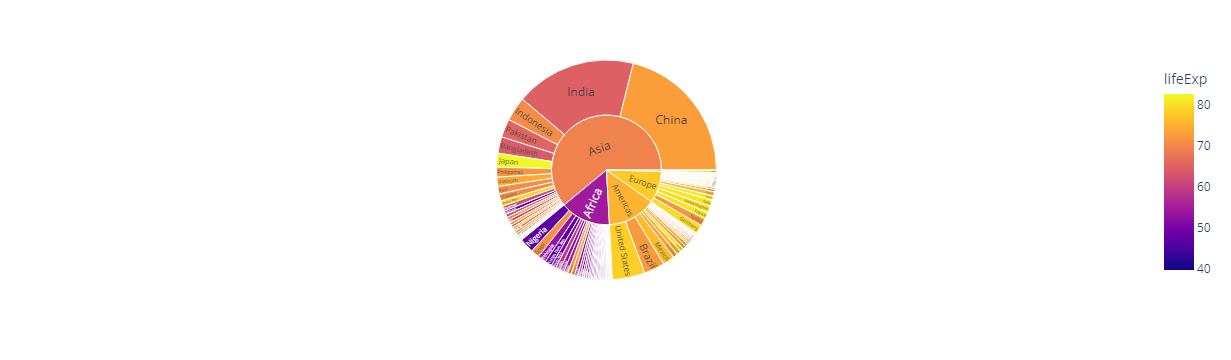

In [8]:
import plotly.express as px

df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(df, path=['continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'])
fig.show()

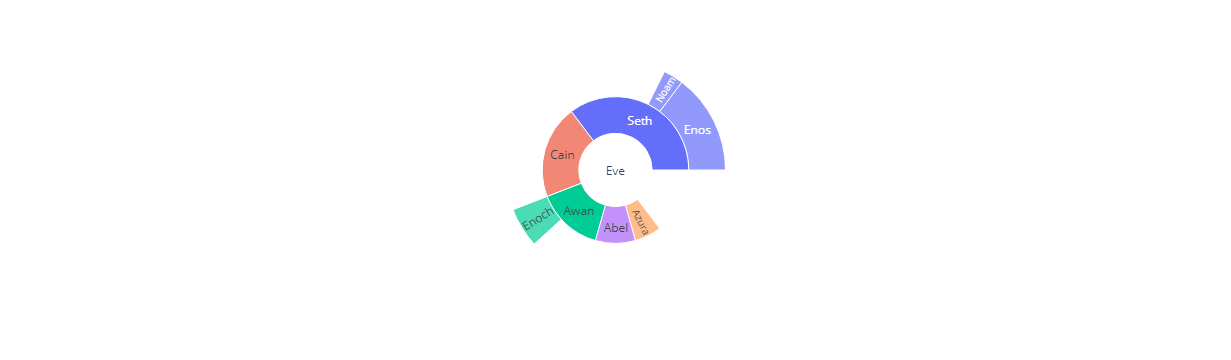

In [11]:
import plotly.express as px
data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[10, 14, 12, 10, 2, 6, 6, 4, 4])

fig = px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.show()

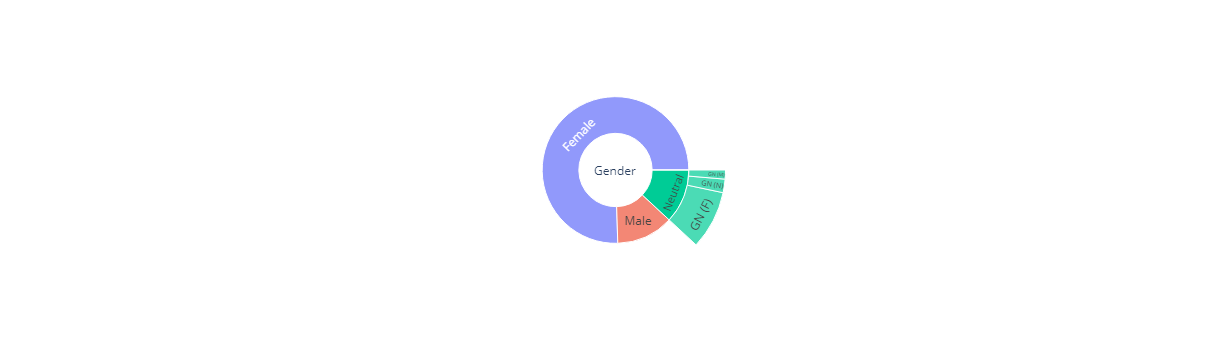

In [13]:
import pandas as pd
import plotly.express as px
import numpy as np
pd.set_option("mode.chained_assignment", None)
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline
%run ~/Data/Core.ipynb

Process_GA()
TGL = pd.read_csv('/home/jovyan/Data/Gender.csv')

data = dict(
    character=TGL['Gender'].tolist(),
    parent=TGL['Parent'].tolist(),
    value=TGL['Count'].tolist())

fig = px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.show()